In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [19]:
base_path = os.getcwd()
file_path = os.path.join(base_path, "outputs", "analysis.csv")

In [20]:
df = pd.read_csv("outputs/analysis.csv")

print(df.head())
print(df.shape)
print(df.dtypes)

         Date   Open_Gold   High_Gold    Low_Gold  Close_Gold  Volume_Gold  \
0  2014-11-30  112.389999  115.959999  109.669998  112.110001    147594200   
1  2014-12-31  113.800003  118.989998  112.410004  113.580002    153722200   
2  2015-01-31  112.489998  125.580002  112.320000  123.449997    198034100   
3  2015-02-28  121.839996  123.160004  114.290001  116.160004    125686200   
4  2015-03-31  116.500000  116.639999  109.769997  113.660004    133483100   

     Open_BTC    High_BTC     Low_BTC   Close_BTC  ...  Close_BTC_Return  \
0  325.569000  457.092987  325.076996  376.446991  ...          0.112692   
1  378.248993  384.037994  304.231995  320.192993  ...         -0.149434   
2  314.079010  315.838989  171.509995  226.425003  ...         -0.292848   
3  226.490997  256.653015  214.725006  253.828003  ...          0.121025   
4  260.356995  300.044006  236.514999  244.223999  ...         -0.037837   

   Close_SP500_Return   P_I  EU_H   C_H  SO_I CFNAI  CFNAI_MA3  DIFFUSION 

In [21]:
# Counting and sorting the unique values for each numerical column in descending order
df.nunique().sort_values(ascending=False)


Date                  126
Open_SP500            126
Close_SP500_Return    126
Close_BTC_Return      126
Close_Gold_Return     126
YearMonth             126
Volume_SP500          126
Open_Gold             126
Low_SP500             126
High_SP500            126
Close_SP500           126
Volume_BTC            126
Low_BTC               126
High_BTC              126
Open_BTC              126
Volume_Gold           126
Close_BTC             126
Low_Gold              125
High_Gold             125
Close_Gold            124
CFNAI                  82
DIFFUSION              75
CFNAI_MA3              70
P_I                    69
SO_I                   52
EU_H                   46
GDP                    43
C_H                    32
dtype: int64

In [22]:
# Summary statistics for the dataset
df.describe()

,Open_Gold,High_Gold,Low_Gold,Close_Gold,Volume_Gold,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,...,Close_BTC_Return,Close_SP500_Return,P_I,EU_H,C_H,SO_I,CFNAI,CFNAI_MA3,DIFFUSION,GDP
count,126.000000,126.000000,126.000000,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,1.260000e+02,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,153.012461,158.711746,149.139048,154.260238,1.764617e+08,21724.981235,25141.073319,18907.838563,22398.387872,4.456063e+11,...,0.067598,0.010474,-0.047381,0.011667,-0.018413,-0.010397,-0.064444,-0.062460,-0.003651,7614.655542
std,40.150433,42.951610,39.011717,41.872083,6.264984e+07,24847.489507,28095.629193,21784.544608,25454.773938,4.203675e+11,...,0.219978,0.043736,0.647579,0.857450,0.181903,0.287581,1.882831,1.063002,0.260755,1283.906229
min,102.300003,104.209999,100.230003,101.459999,9.735590e+07,226.490997,246.274994,171.509995,226.425003,4.106931e+08,...,-0.381862,-0.124871,-5.710000,-8.970000,-1.270000,-2.260000,-18.200000,-7.510000,-0.530000,5970.693000
25%,120.267500,123.492500,116.195004,120.754999,1.363385e+08,2340.887573,2937.082397,2002.704987,2579.465088,2.746821e+10,...,-0.076582,-0.016115,-0.170000,-0.010000,-0.060000,-0.070000,-0.255000,-0.170000,-0.190000,6500.710333
50%,146.580002,154.104996,140.714996,148.215004,1.599676e+08,10138.020996,11831.299805,8741.554199,10153.363770,4.059671e+11,...,0.054528,0.015951,-0.035000,0.040000,-0.030000,-0.005000,0.000000,-0.065000,-0.070000,7239.057000
75%,178.320000,182.382504,169.105003,177.982502,2.044702e+08,34941.306641,41783.871094,29254.290039,35533.413086,7.322810e+11,...,0.179348,0.036746,0.107500,0.090000,0.010000,0.070000,0.217500,0.110000,0.157500,8757.337000
max,288.540009,317.630005,272.579987,303.769989,4.574599e+08,97681.101562,108268.445312,91317.132812,102405.023438,1.692359e+12,...,0.736760,0.126983,2.480000,1.980000,1.010000,1.370000,6.310000,4.520000,0.770000,10117.967333


In [23]:
cols = [
    "Close_BTC", "Close_Gold", "Close_SP500","Close_BTC_Return", "Close_Gold_Return", "Close_SP500_Return","Volume_BTC", "Volume_Gold", "Volume_SP500","GDP", "CFNAI"
]

summary = df[cols].describe().T  # transpose for nicer layout

summary["variance"] = df[cols].var()
summary["range"] = df[cols].max() - df[cols].min()
summary["skewness"] = df[cols].skew()
summary["kurtosis"] = df[cols].kurt()
summary["mode"] = df[cols].mode().iloc[0]  # take first mode if multiple

summary



,count,mean,std,min,25%,50%,75%,max,variance,range,skewness,kurtosis,mode
Close_BTC,126.0,2.239839e+04,2.545477e+04,2.264250e+02,2.579465e+03,1.015336e+04,3.553341e+04,1.024050e+05,6.479455e+08,1.021786e+05,1.305340,0.941826,2.264250e+02
Close_Gold,126.0,1.542602e+02,4.187208e+01,1.014600e+02,1.207550e+02,1.482150e+02,1.779825e+02,3.037700e+02,1.753271e+03,2.023100e+02,1.164420,1.322362,1.236500e+02
Close_SP500,126.0,3.183309e+02,1.235802e+02,1.619300e+02,2.129847e+02,2.793772e+02,4.053768e+02,5.965924e+02,1.527206e+04,4.346624e+02,0.579591,-0.732068,1.619300e+02
Close_BTC_Return,126.0,6.759777e-02,2.199779e-01,-3.818615e-01,-7.658223e-02,5.452798e-02,1.793482e-01,7.367601e-01,4.839029e-02,1.118622e+00,0.569210,0.311511,-3.818615e-01
Close_Gold_Return,126.0,8.726561e-03,4.106038e-02,-8.356571e-02,-1.886526e-02,1.731015e-03,3.222395e-02,1.093034e-01,1.685955e-03,1.928691e-01,0.326422,-0.259744,-8.356571e-02
Close_SP500_Return,126.0,1.047447e-02,4.373620e-02,-1.248713e-01,-1.611543e-02,1.595068e-02,3.674650e-02,1.269835e-01,1.912855e-03,2.518548e-01,-0.364296,0.506269,-1.248713e-01
Volume_BTC,126.0,4.456063e+11,4.203675e+11,4.106931e+08,2.746821e+10,4.059671e+11,7.322810e+11,1.692359e+12,1.767088e+23,1.691949e+12,0.814451,0.206645,4.106931e+08
Volume_Gold,126.0,1.764617e+08,6.264984e+07,9.735590e+07,1.363385e+08,1.599676e+08,2.044702e+08,4.574599e+08,3.925002e+15,3.601040e+08,1.759601,4.078734,9.735590e+07
Volume_SP500,126.0,1.827032e+09,6.988201e+08,8.716413e+08,1.377711e+09,1.646039e+09,2.036015e+09,5.926018e+09,4.883495e+17,5.054376e+09,2.183382,8.858679,8.716413e+08
GDP,126.0,7.614656e+03,1.283906e+03,5.970693e+03,6.500710e+03,7.239057e+03,8.757337e+03,1.011797e+04,1.648415e+06,4.147274e+03,0.517915,-1.132588,6.021176e+03


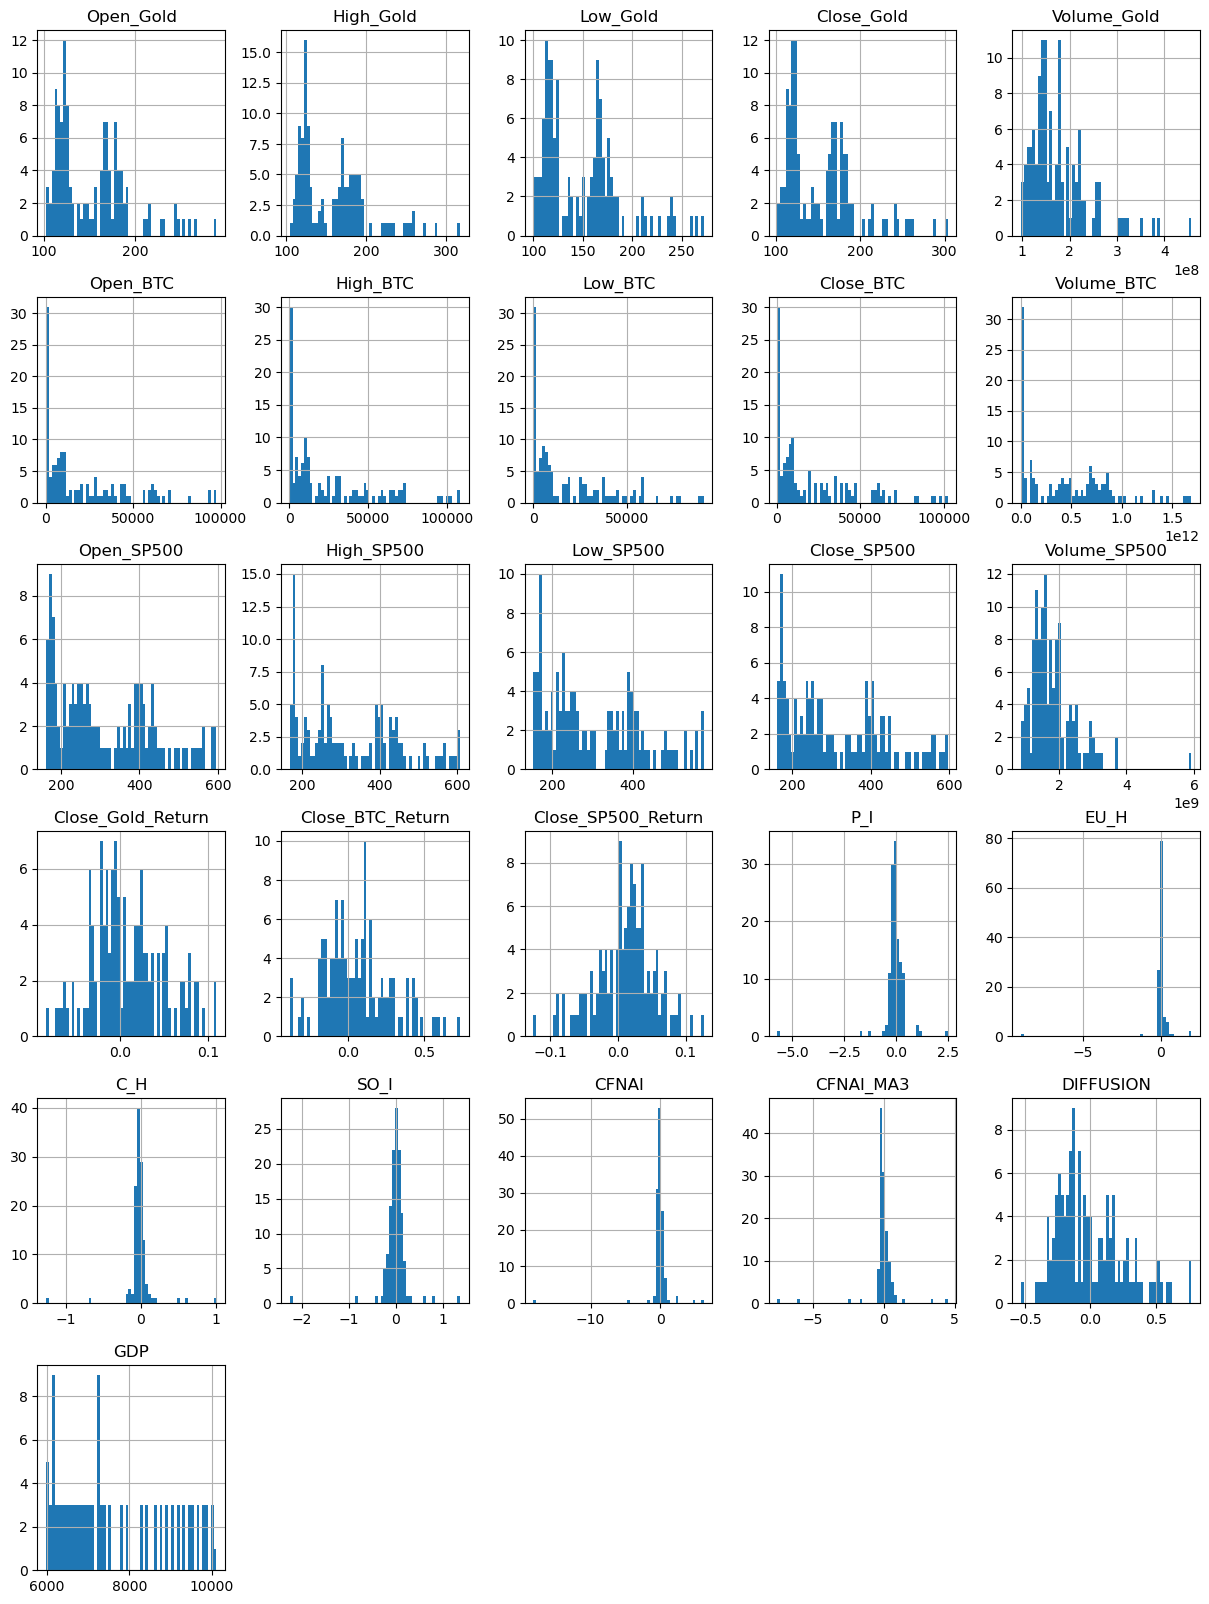

In [24]:
# Creating histograms for each numerical column in 'df_numerical'
df.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

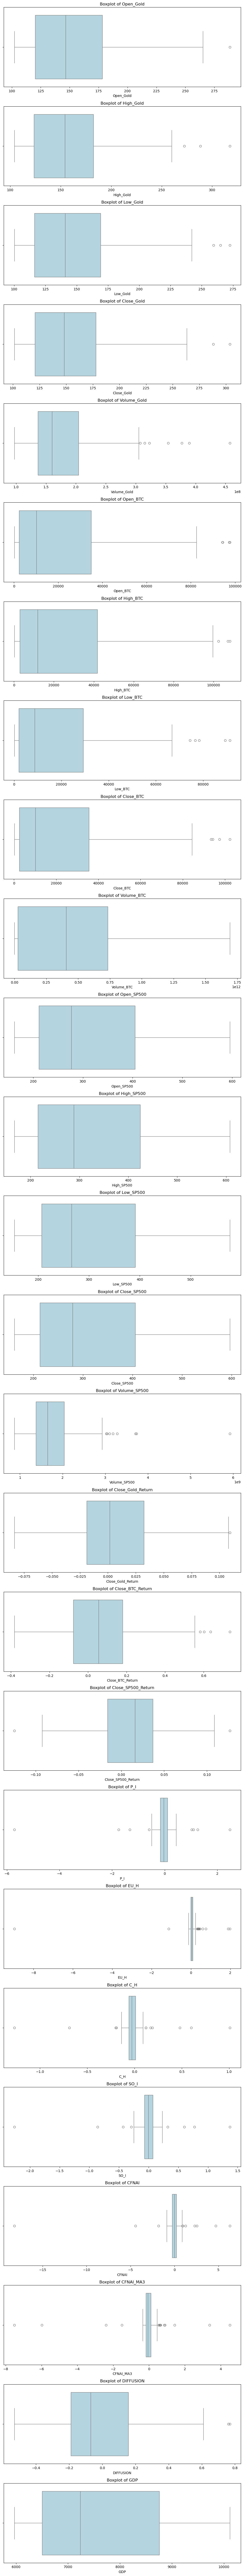

In [25]:
numeric_cols = df.select_dtypes(include="number").columns

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 4*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], color="lightblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()
